<a href="https://colab.research.google.com/github/sepahpourka/Models/blob/main/Napier_40529878_Dissertation_TL_using_various_saved_models_from_TF_Hub_and_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dissertation TL using various saved models from TF Hub and Kaggle**


# Deep Learning Model using NSL-KDD Dataset with text to image conversion

In [41]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
train = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'
test21 = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest-21.txt'

In [43]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [44]:
#train_data = pd.read_csv(train,names=feature)
test_data = pd.read_csv(test,names=feature)
#data = pd.concat([train_data, test_data], ignore_index=True)
data = pd.concat([test_data], ignore_index=True)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [45]:
# Redistribute across common attack class
# Type of attacks: DoS (Denial of Service attacks), R2L (Root to Local attacks), U2R (User to Root attack) and Probe (Probing attacks).
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(data)

In [46]:
# distribution of attack classes
data.label.value_counts()

normal    9711
Dos       7460
R2L       2885
Probe     2421
U2R         67
Name: label, dtype: int64

In [47]:
label = pd.DataFrame(data.label)


# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
from sklearn import preprocessing
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data

(22544, 44)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty,intrusion
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos,21,0
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,Dos,21,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,4
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,Probe,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,Probe,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,4
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21,4
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,Dos,15,0
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21,4


In [48]:
df = pd.DataFrame(data)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty,intrusion
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos,21,0
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Dos,21,0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21,4
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Probe,15,1
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Probe,11,1


In [49]:
df['information'] = df['duration'].astype(str) + " "+ df['protocol_type'].astype(str) + " "+ df['service'].astype(str) + " "+ df['flag'].astype(str) + " "+ df['src_bytes'].astype(str) + " "+ df['dst_bytes'].astype(str) + " "+ df['land'].astype(str) + " "+ df['wrong_fragment'].astype(str) + " "+ df['urgent'].astype(str) + " "+ df['hot'].astype(str) + " "+ df['num_failed_logins'].astype(str) + " "+ df['logged_in'].astype(str) + " "+ df['num_compromised'].astype(str) + " "+ df['root_shell'].astype(str) + " "+ df['su_attempted'].astype(str) + " "+ df['num_root'].astype(str) + " "+ df['num_file_creations'].astype(str) + " "+ df['num_shells'].astype(str) + " "+ df['num_access_files'].astype(str) + " "+ df['num_outbound_cmds'].astype(str) + " "+ df['is_host_login'].astype(str) + " "+ df['is_guest_login'].astype(str) + " "+ df['count'].astype(str) + " "+ df['srv_count'].astype(str) + " "+ df['serror_rate'].astype(str) + " "+ df['srv_serror_rate'].astype(str) + " "+ df['rerror_rate'].astype(str) + " "+ df['srv_rerror_rate'].astype(str) + " "+ df['same_srv_rate'].astype(str) + " "+ df['diff_srv_rate'].astype(str) + " "+ df['srv_diff_host_rate'].astype(str) + " "+ df['dst_host_count'].astype(str) + " "+ df['dst_host_srv_count'].astype(str) + " "+ df['dst_host_same_srv_rate'].astype(str) + " "+ df['dst_host_diff_srv_rate'].astype(str) + " "+ df['dst_host_same_src_port_rate'].astype(str) + " "+ df['dst_host_srv_diff_host_rate'].astype(str) + " "+ df['dst_host_serror_rate'].astype(str) + " "+ df['dst_host_srv_serror_rate'].astype(str) + " "+ df['dst_host_rerror_rate'].astype(str) + " "+ df['dst_host_srv_rerror_rate'].astype(str)


# remove attribute 'difficulty_level'
df.drop(['duration'],axis=1,inplace=True)
df.drop(['protocol_type'],axis=1,inplace=True)
df.drop(['service'],axis=1,inplace=True)
df.drop(['flag'],axis=1,inplace=True)
df.drop(['src_bytes'],axis=1,inplace=True)
df.drop(['dst_bytes'],axis=1,inplace=True)
df.drop(['land'],axis=1,inplace=True)
df.drop(['wrong_fragment'],axis=1,inplace=True)
df.drop(['urgent'],axis=1,inplace=True)
df.drop(['hot'],axis=1,inplace=True)
df.drop(['num_failed_logins'],axis=1,inplace=True)
df.drop(['logged_in'],axis=1,inplace=True)
df.drop(['num_compromised'],axis=1,inplace=True)
df.drop(['root_shell'],axis=1,inplace=True)
df.drop(['su_attempted'],axis=1,inplace=True)
df.drop(['num_root'],axis=1,inplace=True)
df.drop(['num_file_creations'],axis=1,inplace=True)
df.drop(['num_shells'],axis=1,inplace=True)
df.drop(['num_access_files'],axis=1,inplace=True)
df.drop(['num_outbound_cmds'],axis=1,inplace=True)
df.drop(['is_host_login'],axis=1,inplace=True)
df.drop(['is_guest_login'],axis=1,inplace=True)
df.drop(['count'],axis=1,inplace=True)
df.drop(['srv_count'],axis=1,inplace=True)
df.drop(['serror_rate'],axis=1,inplace=True)
df.drop(['srv_serror_rate'],axis=1,inplace=True)
df.drop(['rerror_rate'],axis=1,inplace=True)
df.drop(['srv_rerror_rate'],axis=1,inplace=True)
df.drop(['same_srv_rate'],axis=1,inplace=True)
df.drop(['diff_srv_rate'],axis=1,inplace=True)
df.drop(['srv_diff_host_rate'],axis=1,inplace=True)
df.drop(['dst_host_count'],axis=1,inplace=True)
df.drop(['dst_host_srv_count'],axis=1,inplace=True)
df.drop(['dst_host_same_srv_rate'],axis=1,inplace=True)
df.drop(['dst_host_diff_srv_rate'],axis=1,inplace=True)
df.drop(['dst_host_same_src_port_rate'],axis=1,inplace=True)
df.drop(['dst_host_srv_diff_host_rate'],axis=1,inplace=True)
df.drop(['dst_host_serror_rate'],axis=1,inplace=True)
df.drop(['dst_host_srv_serror_rate'],axis=1,inplace=True)
df.drop(['dst_host_rerror_rate'],axis=1,inplace=True)
df.drop(['dst_host_srv_rerror_rate'],axis=1,inplace=True)
df.drop(['difficulty'],axis=1,inplace=True)

df.head()

,label,intrusion,information
0,Dos,0,0 tcp private REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,Dos,0,0 tcp private REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,normal,4,2 tcp ftp_data SF 12983 0 0 0 0 0 0 0 0 0 0 0 ...
3,Probe,1,0 icmp eco_i SF 20 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,Probe,1,1 tcp telnet RSTO 0 15 0 0 0 0 0 0 0 0 0 0 0 0...


In [50]:
df

,label,intrusion,information
0,Dos,0,0 tcp private REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,Dos,0,0 tcp private REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,normal,4,2 tcp ftp_data SF 12983 0 0 0 0 0 0 0 0 0 0 0 ...
3,Probe,1,0 icmp eco_i SF 20 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,Probe,1,1 tcp telnet RSTO 0 15 0 0 0 0 0 0 0 0 0 0 0 0...
...,...,...,...
22539,normal,4,0 tcp smtp SF 794 333 0 0 0 0 0 1 0 0 0 0 0 0 ...
22540,normal,4,0 tcp http SF 317 938 0 0 0 0 0 1 0 0 0 0 0 0 ...
22541,Dos,0,0 tcp http SF 54540 8314 0 0 0 2 0 1 1 0 0 0 0...
22542,normal,4,0 udp domain_u SF 42 42 0 0 0 0 0 0 0 0 0 0 0 ...


In [51]:
df.shape

(22544, 3)

In [52]:
!pip3 install text_to_image

In [53]:
# importing os module
import os
import shutil

# path
images_path = '/content/images'
if os.path.isdir(images_path):
  shutil.rmtree(images_path)
else:
   print("Given directory doesn't exist")


In [54]:
# path
images_path = '/content/images'
dos_path = '/content/images/Dos'
probe_path = '/content/images/Probe'
normal_path = '/content/images/normal'
R2L_path = '/content/images/R2L'
U2R_path = '/content/images/U2R'

# Create the directory
# 'GeeksForGeeks' in
# '/home/User/Documents'
try:
    os.mkdir(images_path)
    os.mkdir(dos_path)
    os.mkdir(probe_path)
    os.mkdir(normal_path)
    os.mkdir(R2L_path)
    os.mkdir(U2R_path)
except OSError as error:
    print(error)

In [55]:
#print(df.loc[0,'information'])

import text_to_image


for index in df.index:
  filename = "/content/images/" + df.loc[index,'label'] + "/" + "image_" + str(index) +".png"
  df.loc[index,'information'] = text_to_image.encode(df.loc[index,'information'], filename)

#df.loc[0,'information'] = text_to_image.encode(df.loc[0,'information'], "image.png")

In [56]:
import pathlib
data_dir = "/content/images"
data_dir = pathlib.Path(data_dir).with_suffix('')

In [57]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

22544


In [58]:
import PIL

normal = list(data_dir.glob('normal/*'))
PIL.Image.open(str(normal[0]))

In [59]:
Probe = list(data_dir.glob('Probe/*'))
PIL.Image.open(str(Probe[1]))

In [60]:
print(df.loc[0,'information'])

/content/images/Dos/image_0.png


In [61]:
from PIL import Image
# iterate over files in
# that directory
for filename in os.listdir('/content/images/Dos'):
    image = Image.open("/content/images/Dos/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/Dos/" + filename)
for filename in os.listdir('/content/images/Probe'):
    image = Image.open("/content/images/Probe/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/Probe/" + filename)
for filename in os.listdir('/content/images/R2L'):
    image = Image.open("/content/images/R2L/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/R2L/" + filename)
for filename in os.listdir('/content/images/U2R'):
    image = Image.open("/content/images/U2R/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/U2R/" + filename)
for filename in os.listdir('/content/images/normal'):
    image = Image.open("/content/images/normal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/normal/" + filename)

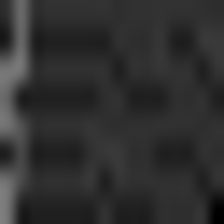

In [62]:
Probe = list(data_dir.glob('Probe/*'))
PIL.Image.open(str(Probe[1]))

In [63]:
batch_size = 32
img_height = 224
img_width = 224

In [64]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22544 files belonging to 5 classes.
Using 18036 files for training.


In [65]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 22544 files belonging to 5 classes.
Using 4508 files for validation.


In [66]:
class_names = train_ds.class_names
print(class_names)

['Dos', 'Probe', 'R2L', 'U2R', 'normal']


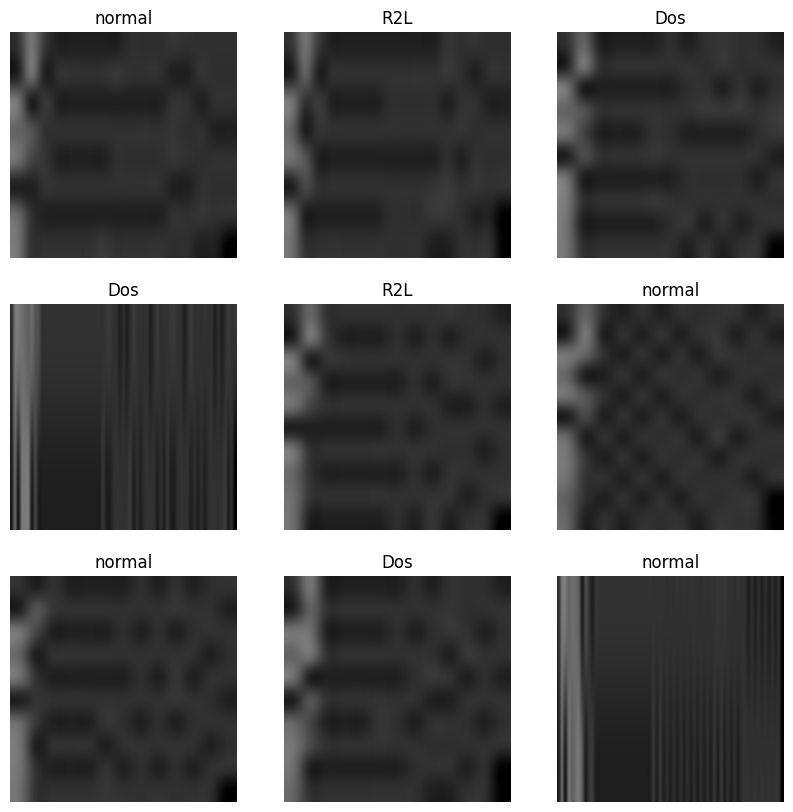

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [68]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [69]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [70]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [71]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.48235297


In [72]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [75]:
epochs=10
history = model.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
564/564 [==============================] - 19s 30ms/step - loss: 0.5872 - accuracy: 0.7778 - val_loss: 0.3370 - val_accuracy: 0.8815
Epoch 2/10
564/564 [==============================] - 17s 30ms/step - loss: 0.1984 - accuracy: 0.9331 - val_loss: 0.1670 - val_accuracy: 0.9470
Epoch 3/10
564/564 [==============================] - 17s 30ms/step - loss: 0.1375 - accuracy: 0.9544 - val_loss: 0.1456 - val_accuracy: 0.9488
Epoch 4/10
564/564 [==============================] - 17s 30ms/step - loss: 0.1130 - accuracy: 0.9613 - val_loss: 0.1537 - val_accuracy: 0.9503
Epoch 5/10
564/564 [==============================] - 17s 30ms/step - loss: 0.0936 - accuracy: 0.9682 - val_loss: 0.1173 - val_accuracy: 0.9634
Epoch 6/10
564/564 [==============================] - 17s 30ms/step - loss: 0.0836 - accuracy: 0.9710 - val_loss: 0.1156 - val_accuracy: 0.9601
Epoch 7/10
564/564 [==============================] - 17s 30ms/step - loss: 0.0728 - accuracy: 0.9739 - val_loss: 0.1093 - val_accuracy:

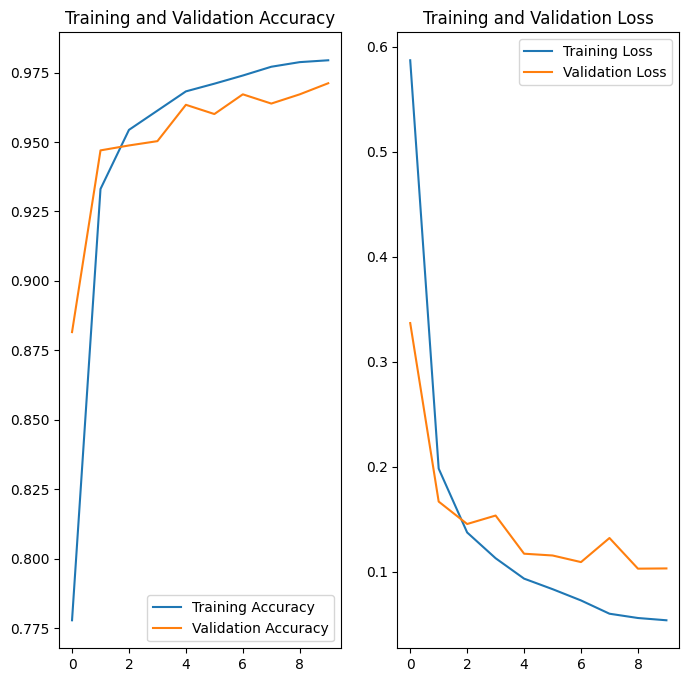

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Transfer Learning using TF2.0 Saved Model (v5)

In [77]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow_hub as hub
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

hub_layer = hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5', trainable=True, arguments=dict(batch_norm_momentum=0.997))

tmodel = Sequential()
tmodel.add(hub_layer)

tmodel.add(Dense(num_classes, name="outputs"))

tmodel.build([None, 224, 224, 3])  # Batch input shape.

tmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 outputs (Dense)             (None, 5)                 5010      
                                                                 
Total params: 25620859 (97.74 MB)
Trainable params: 25575419 (97.56 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [78]:
#tmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
tmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [79]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=3)
history = tmodel.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback,
  verbose=1
)

Epoch 1/10
564/564 [==============================] - 199s 301ms/step - loss: 0.8057 - accuracy: 0.8515 - val_loss: 20.6096 - val_accuracy: 0.4463
Epoch 2/10
564/564 [==============================] - 169s 300ms/step - loss: 0.5286 - accuracy: 0.9398 - val_loss: 3.7273 - val_accuracy: 0.3789
Epoch 3/10
564/564 [==============================] - 168s 299ms/step - loss: 1.6590 - accuracy: 0.6486 - val_loss: 441.7325 - val_accuracy: 0.4241
Epoch 4/10
564/564 [==============================] - 168s 298ms/step - loss: 1.0928 - accuracy: 0.8180 - val_loss: 1.6100 - val_accuracy: 0.5384
Epoch 5/10
564/564 [==============================] - 168s 298ms/step - loss: 0.7894 - accuracy: 0.8993 - val_loss: 1.6673 - val_accuracy: 0.5035
Epoch 5: early stopping


In [80]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

# Transfer Learning using TF2.0 Saved Model (v1)

In [81]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow_hub as hub
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

hub_layer1 = hub.KerasLayer('https://tfhub.dev/tensorflow/resnet_50/classification/1', trainable=True)

vmodel = Sequential()
vmodel.add(hub_layer1)

vmodel.add(Dense(num_classes, name="outputs"))

vmodel.build([None, 224, 224, 3])  # Batch input shape.

vmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              25612201  
                                                                 
 outputs (Dense)             (None, 5)                 5010      
                                                                 
Total params: 25617211 (97.72 MB)
Trainable params: 25564091 (97.52 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [82]:
vmodel.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [83]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=3)
history = vmodel.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback,
  verbose=1
)

Epoch 1/10
564/564 [==============================] - 224s 342ms/step - loss: 1.4817 - accuracy: 0.5032 - val_loss: 1.3874 - val_accuracy: 0.4554
Epoch 2/10
564/564 [==============================] - 188s 334ms/step - loss: 1.1967 - accuracy: 0.5963 - val_loss: 1.0609 - val_accuracy: 0.6517
Epoch 3/10
564/564 [==============================] - 188s 333ms/step - loss: 1.0062 - accuracy: 0.6557 - val_loss: 1.0709 - val_accuracy: 0.6449
Epoch 4/10
564/564 [==============================] - 187s 332ms/step - loss: 0.9207 - accuracy: 0.6639 - val_loss: 1.4494 - val_accuracy: 0.3742
Epoch 5/10
564/564 [==============================] - 187s 332ms/step - loss: 0.9137 - accuracy: 0.6586 - val_loss: 0.9692 - val_accuracy: 0.6253
Epoch 6/10
564/564 [==============================] - 187s 331ms/step - loss: 0.8629 - accuracy: 0.6658 - val_loss: 0.8609 - val_accuracy: 0.6637
Epoch 7/10
564/564 [==============================] - 187s 331ms/step - loss: 0.8393 - accuracy: 0.6692 - val_loss: 0.9627 -

In [84]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

# Transfer Learning using imagenet/mobilenet_v1_100_224/classification

In [85]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow_hub as hub

hub_layer1 = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/5",
               trainable=True, arguments=dict(batch_norm_momentum=0.997))

wmodel = Sequential()
wmodel.add(hub_layer1)

wmodel.add(Dense(num_classes, name="outputs"))

wmodel.build([None, 224, 224, 3])  # Batch input shape.

wmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              4254889   
                                                                 
 outputs (Dense)             (None, 5)                 5010      
                                                                 
Total params: 4259899 (16.25 MB)
Trainable params: 4238011 (16.17 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [86]:
wmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=3)
history = wmodel.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback,
  verbose=1
)

Epoch 1/10
564/564 [==============================] - 85s 125ms/step - loss: 0.6701 - accuracy: 0.8890 - val_loss: 0.8477 - val_accuracy: 0.7700
Epoch 2/10
564/564 [==============================] - 68s 121ms/step - loss: 0.3722 - accuracy: 0.9512 - val_loss: 0.5947 - val_accuracy: 0.8529
Epoch 3/10
564/564 [==============================] - 68s 121ms/step - loss: 0.3365 - accuracy: 0.9616 - val_loss: 0.4119 - val_accuracy: 0.9317
Epoch 4/10
564/564 [==============================] - 68s 121ms/step - loss: 0.3251 - accuracy: 0.9629 - val_loss: 0.5424 - val_accuracy: 0.9033
Epoch 5/10
564/564 [==============================] - 69s 122ms/step - loss: 0.2961 - accuracy: 0.9676 - val_loss: 0.4666 - val_accuracy: 0.9208
Epoch 6/10
564/564 [==============================] - 68s 121ms/step - loss: 0.2801 - accuracy: 0.9696 - val_loss: 0.5894 - val_accuracy: 0.8551
Epoch 7/10
564/564 [==============================] - 68s 121ms/step - loss: 0.2643 - accuracy: 0.9724 - val_loss: 0.5941 - val_ac

In [88]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

# Transfer Learning using SIIM-ISIC Melanoma Classification · resnet_50 (classification)

In [89]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow_hub as hub

hub_layer1 = hub.KerasLayer("https://kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1",
               trainable=True)

xmodel = Sequential()
xmodel.add(hub_layer1)

xmodel.add(Dense(num_classes, name="outputs"))

xmodel.build([None, 224, 224, 3])  # Batch input shape.

xmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              25612201  
                                                                 
 outputs (Dense)             (None, 5)                 5010      
                                                                 
Total params: 25617211 (97.72 MB)
Trainable params: 25564091 (97.52 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [90]:
xmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [91]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=3)
history = xmodel.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback,
  verbose=1
)

Epoch 1/10
564/564 [==============================] - 220s 338ms/step - loss: 1.4720 - accuracy: 0.4657 - val_loss: 1.3444 - val_accuracy: 0.3758
Epoch 2/10
564/564 [==============================] - 188s 333ms/step - loss: 1.2430 - accuracy: 0.5331 - val_loss: 1.1482 - val_accuracy: 0.5739
Epoch 3/10
564/564 [==============================] - 187s 332ms/step - loss: 1.1508 - accuracy: 0.5832 - val_loss: 1.4038 - val_accuracy: 0.3234
Epoch 4/10
564/564 [==============================] - 187s 332ms/step - loss: 1.0931 - accuracy: 0.5954 - val_loss: 1.0135 - val_accuracy: 0.6213
Epoch 5/10
564/564 [==============================] - 187s 332ms/step - loss: 1.0332 - accuracy: 0.6319 - val_loss: 1.1308 - val_accuracy: 0.5796
Epoch 6/10
564/564 [==============================] - 187s 332ms/step - loss: 0.9754 - accuracy: 0.6511 - val_loss: 0.9295 - val_accuracy: 0.6588
Epoch 7/10
564/564 [==============================] - 187s 331ms/step - loss: 0.9264 - accuracy: 0.6618 - val_loss: 0.9762 -

In [92]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

# Transfer Learning using Imagenet (ILSVRC-2012-CLS) classification with ResNet V2 50.

In [93]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow_hub as hub

hub_layer1 = hub.KerasLayer("https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/101-classification/versions/2",
               trainable=True)

zmodel = Sequential()
zmodel.add(hub_layer1)

zmodel.add(Dense(num_classes, name="outputs"))

zmodel.build([None, 224, 224, 3])  # Batch input shape.

zmodel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              44677609  
                                                                 
 outputs (Dense)             (None, 5)                 5010      
                                                                 
Total params: 44682619 (170.45 MB)
Trainable params: 44584955 (170.08 MB)
Non-trainable params: 97664 (381.50 KB)
_________________________________________________________________


In [94]:
zmodel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [95]:
epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=3)
history = zmodel.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=callback,
  verbose=1
)

Epoch 1/10
564/564 [==============================] - 358s 534ms/step - loss: 0.9426 - accuracy: 0.8082 - val_loss: 1.5867 - val_accuracy: 0.5697
Epoch 2/10
564/564 [==============================] - 300s 532ms/step - loss: 0.6112 - accuracy: 0.9194 - val_loss: 2.1988 - val_accuracy: 0.4031
Epoch 3/10
564/564 [==============================] - 300s 532ms/step - loss: 0.4978 - accuracy: 0.9408 - val_loss: 0.9390 - val_accuracy: 0.7382
Epoch 4/10
564/564 [==============================] - 297s 527ms/step - loss: 1.3703 - accuracy: 0.6728 - val_loss: 1.7501 - val_accuracy: 0.3234
Epoch 5/10
564/564 [==============================] - 295s 523ms/step - loss: 1.6082 - accuracy: 0.5057 - val_loss: 1.5798 - val_accuracy: 0.4567
Epoch 6/10
564/564 [==============================] - 295s 523ms/step - loss: 1.1507 - accuracy: 0.6833 - val_loss: 1.4796 - val_accuracy: 0.5617
Epoch 6: early stopping


In [96]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"

# Transfer Learning using VGG16

In [97]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

img_rows, img_cols, img_channel = 224, 224, 3

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

58889256/58889256 [==============================] - 4s 0us/step


In [98]:
newt_model = Sequential()
newt_model.add(Flatten(input_shape=base_model.output_shape[1:]))
newt_model.add(Dense(256, activation='relu'))
newt_model.add(Dense(5, activation='softmax'))

newt_model = Model(inputs=base_model.input, outputs=newt_model(base_model.output))

newt_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [99]:
newt_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', verbose=1, patience=3)
history = newt_model.fit(
  train_ds,
  batch_size=10,
  validation_data=val_ds,
  callbacks=callback,
  epochs=epochs
)

Epoch 1/10
564/564 [==============================] - 250s 415ms/step - loss: 1.7539 - accuracy: 0.4192 - val_loss: 1.2403 - val_accuracy: 0.4468
Epoch 2/10
564/564 [==============================] - 220s 391ms/step - loss: 1.2738 - accuracy: 0.4255 - val_loss: 1.2372 - val_accuracy: 0.4468
Epoch 3/10
564/564 [==============================] - 219s 389ms/step - loss: 1.2524 - accuracy: 0.4268 - val_loss: 1.2361 - val_accuracy: 0.4468
Epoch 4/10
564/564 [==============================] - 219s 389ms/step - loss: 1.2527 - accuracy: 0.4268 - val_loss: 1.2373 - val_accuracy: 0.4468
Epoch 5/10
564/564 [==============================] - 219s 389ms/step - loss: 1.2527 - accuracy: 0.4268 - val_loss: 1.2378 - val_accuracy: 0.4468
Epoch 6/10
564/564 [==============================] - 219s 389ms/step - loss: 1.2526 - accuracy: 0.4268 - val_loss: 1.2374 - val_accuracy: 0.4468
Epoch 6: early stopping


In [101]:
"""
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
"""

"\nacc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\n\nloss = history.history['loss']\nval_loss = history.history['val_loss']\n\nepochs_range = range(epochs)\n\nplt.figure(figsize=(8, 8))\nplt.subplot(1, 2, 1)\nplt.plot(epochs_range, acc, label='Training Accuracy')\nplt.plot(epochs_range, val_acc, label='Validation Accuracy')\nplt.legend(loc='lower right')\nplt.title('Training and Validation Accuracy')\n\nplt.subplot(1, 2, 2)\nplt.plot(epochs_range, loss, label='Training Loss')\nplt.plot(epochs_range, val_loss, label='Validation Loss')\nplt.legend(loc='upper right')\nplt.title('Training and Validation Loss')\nplt.show()\n"